In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
import seaborn as sns

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic=titanic.drop(columns_to_drop,axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## EDA

### Data Manipulation

In [5]:
titanic_eda=titanic.copy()
titanic_eda.Survived=titanic_eda.Survived.map({0:'Not Survived',1:'Survived'})

In [6]:
titanic_eda.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
titanic_eda.Pclass=titanic_eda.Pclass.map({1:'First Class',2:'Second Class',3:'Third Class'})

In [8]:
titanic_eda.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
titanic_eda.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
cat_cols=titanic_eda.select_dtypes(include='object').columns.values
cat_cols

array(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype=object)

In [11]:
for col in cat_cols:
    print(titanic_eda[col].value_counts(normalize=True),'\n')

Survived
Not Survived    0.616162
Survived        0.383838
Name: proportion, dtype: float64 

Pclass
Third Class     0.551066
First Class     0.242424
Second Class    0.206510
Name: proportion, dtype: float64 

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64 

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64 



In [12]:
titanic_eda[cat_cols].isna().sum()

Survived    0
Pclass      0
Sex         0
Embarked    2
dtype: int64

In [13]:
titanic_eda.Embarked=np.where(titanic_eda.Embarked.isna(),'Not Available',titanic_eda.Embarked)
titanic_eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Not Survived,Third Class,male,22.0,1,0,7.2500,S
1,Survived,First Class,female,38.0,1,0,71.2833,C
2,Survived,Third Class,female,26.0,0,0,7.9250,S
3,Survived,First Class,female,35.0,1,0,53.1000,S
4,Not Survived,Third Class,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,Not Survived,Second Class,male,27.0,0,0,13.0000,S
887,Survived,First Class,female,19.0,0,0,30.0000,S
888,Not Survived,Third Class,female,NaN,1,2,23.4500,S
889,Survived,First Class,male,26.0,0,0,30.0000,C


In [14]:
titanic_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [15]:
titanic_eda.Age=np.where(titanic_eda.Age.isna(),titanic_eda.Age.mean(),titanic_eda.Age)

In [16]:
titanic_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


### Univariate Analysis

In [17]:
cat_cols=titanic_eda.select_dtypes('object').columns.values.tolist()
num_cols=titanic_eda.select_dtypes('number').columns.values.tolist()

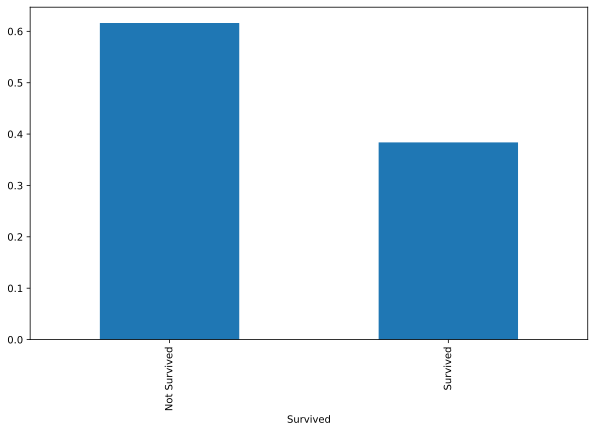

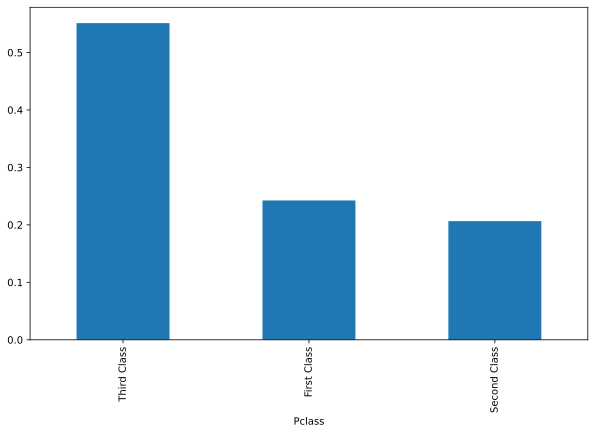

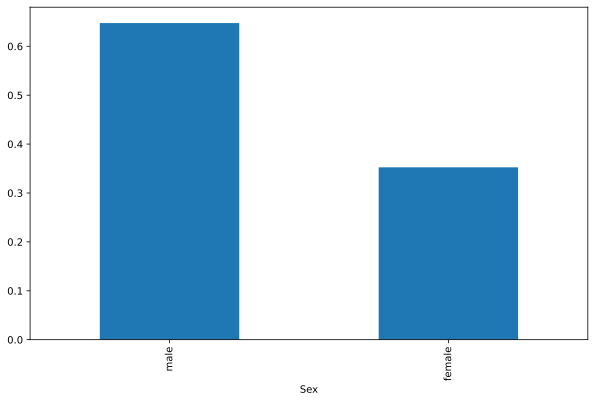

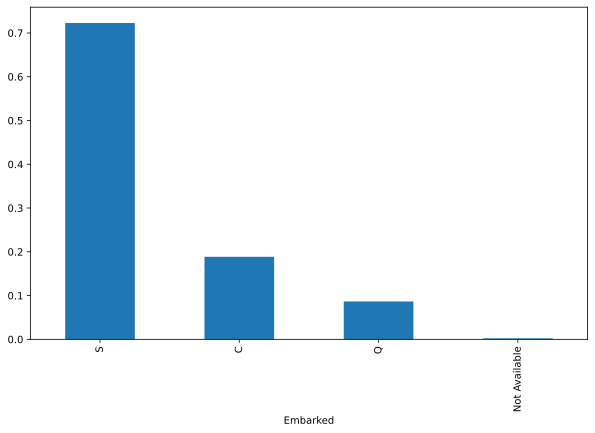

In [18]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    titanic_eda[col].value_counts(normalize=True).plot(kind='bar')
    plt.show()

In [19]:
titanic_eda[num_cols].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


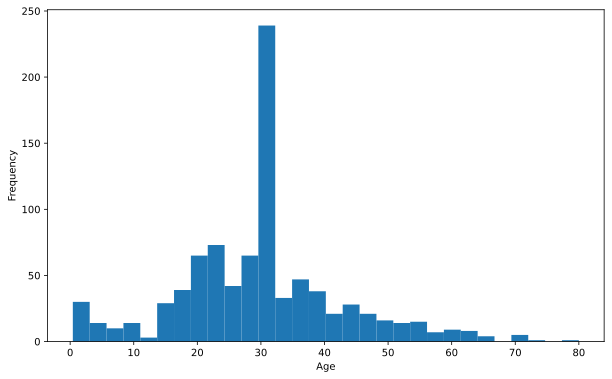

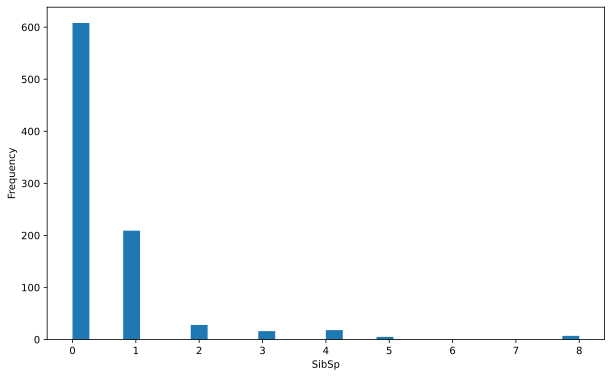

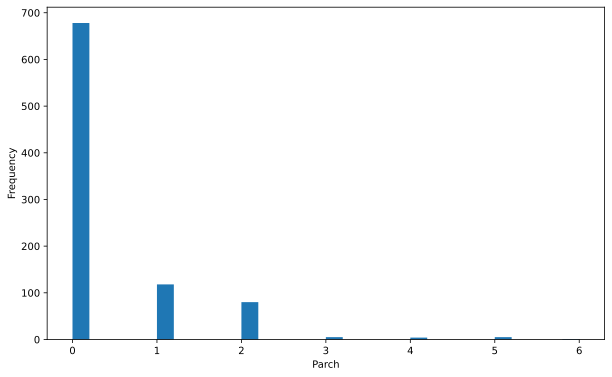

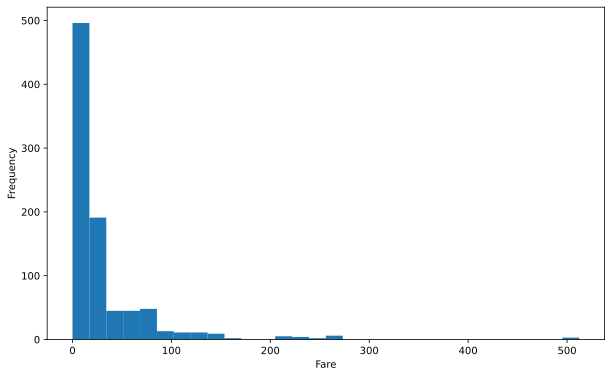

In [20]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    titanic_eda[col].plot.hist(bins=30)
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis: Between categorical features

In [21]:
X=titanic_eda[cat_cols].drop('Survived',axis=1)

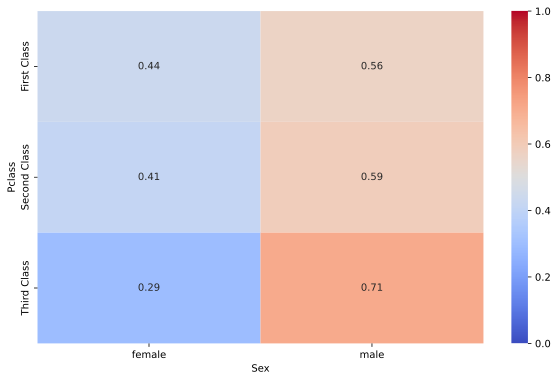

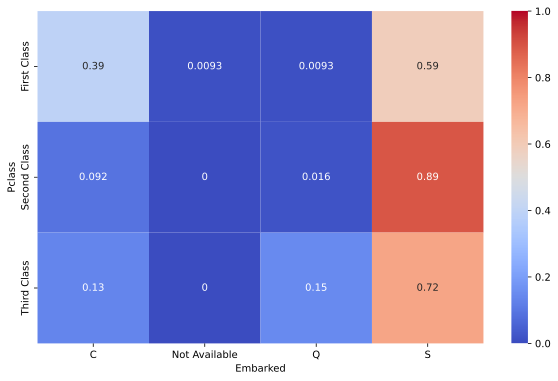

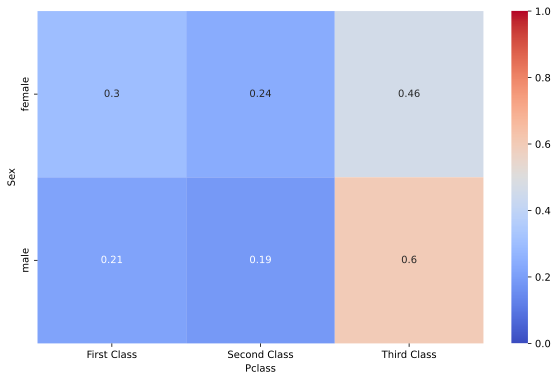

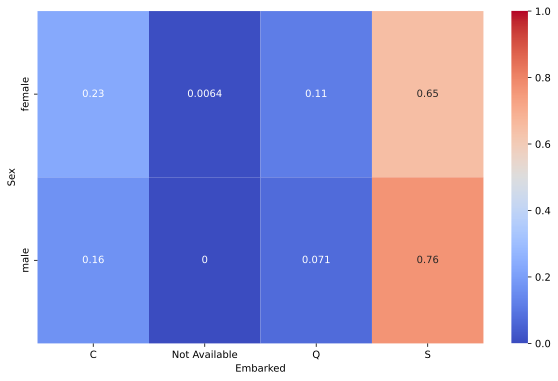

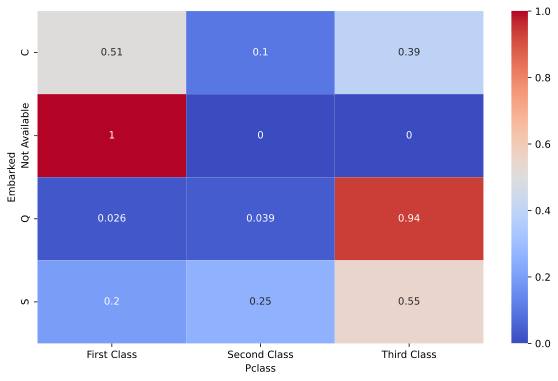

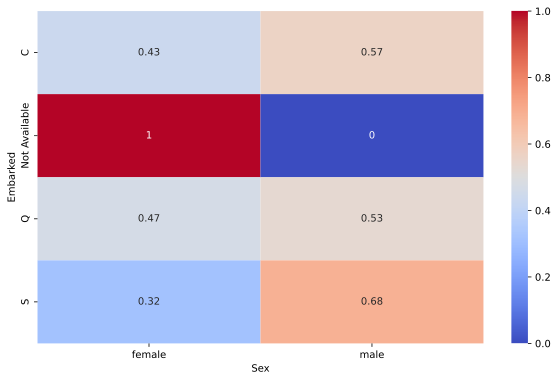

In [22]:
for col1 in X.columns.values:
    for col2 in X.columns.values:
        if col1!=col2:
            plt.figure(figsize=(10,6))
            sns.heatmap(data=pd.crosstab(titanic_eda[col1],titanic_eda[col2],normalize='index'),
                        annot=True,
                        cmap='coolwarm',
                        vmin=0,
                        vmax=1)
            plt.show()

### Bivariate Analysis: Between numerical features

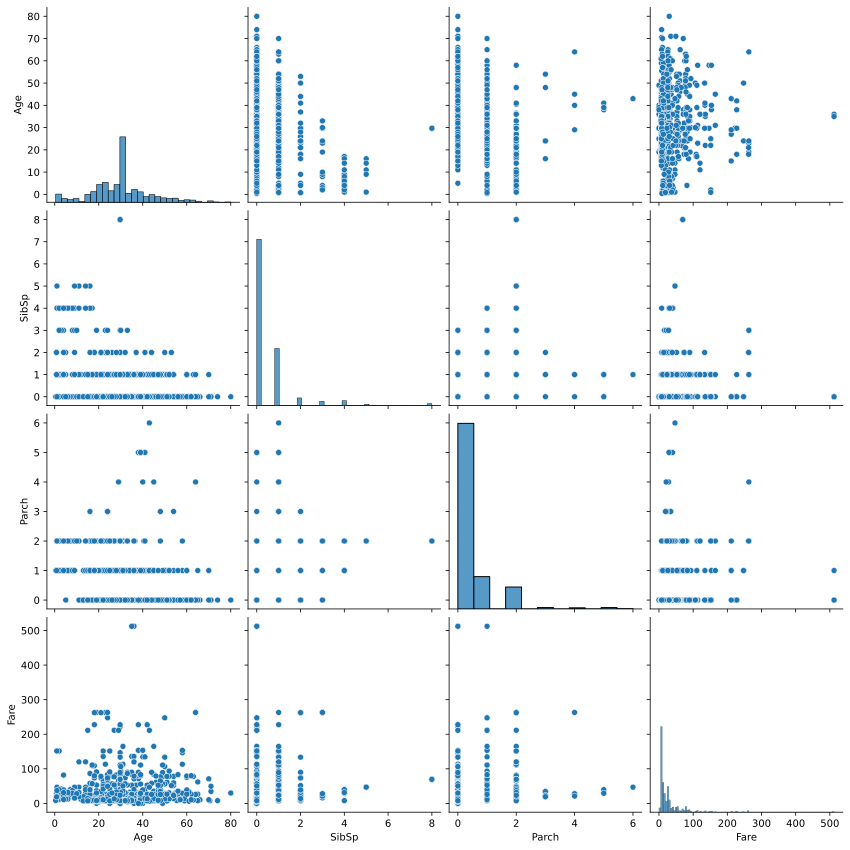

In [23]:
sns.pairplot(titanic_eda[num_cols],height=3);

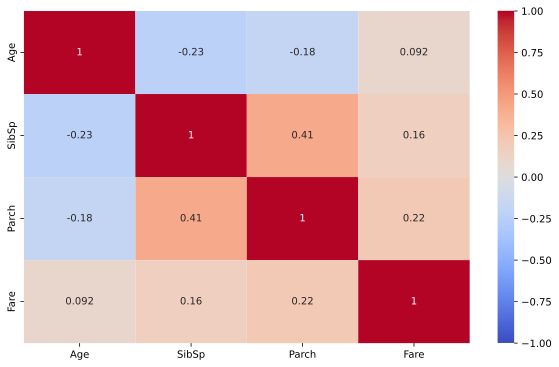

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_eda[num_cols].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1);

### Bivariate Analysis: Between categorical and numerical features

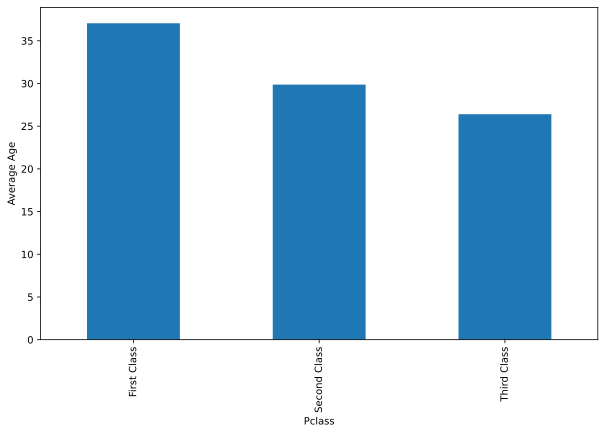

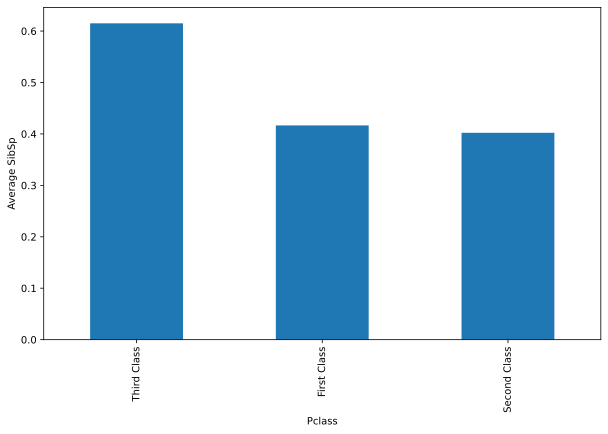

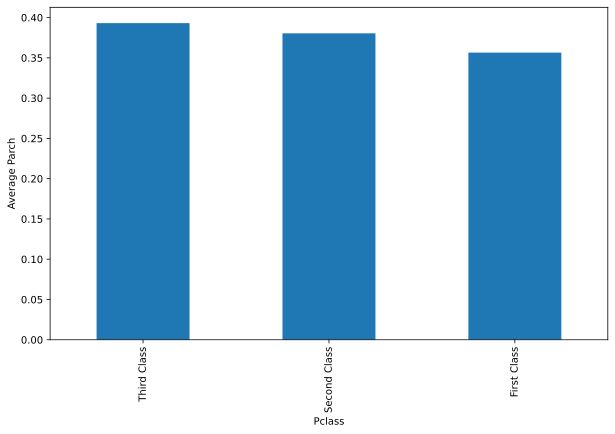

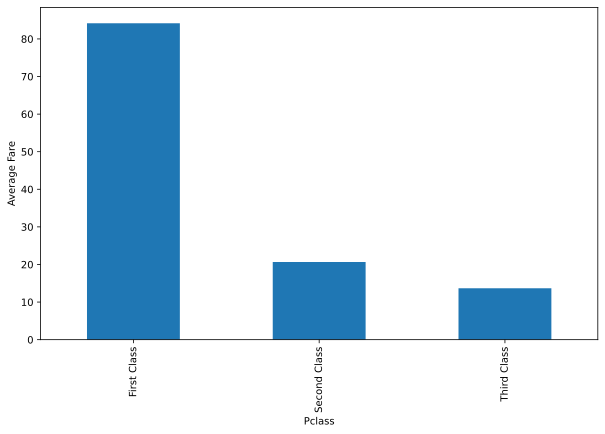

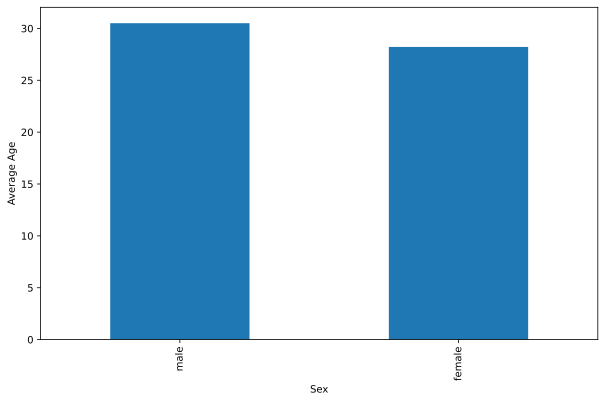

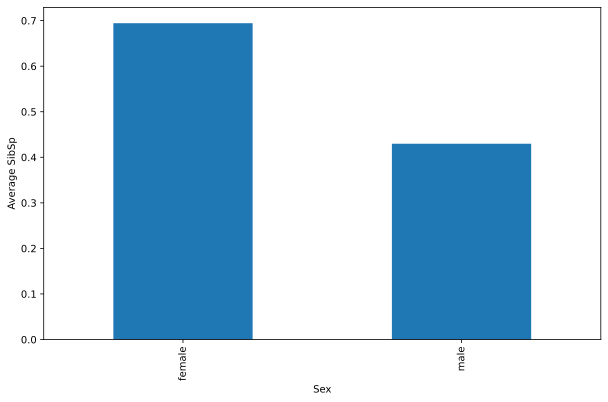

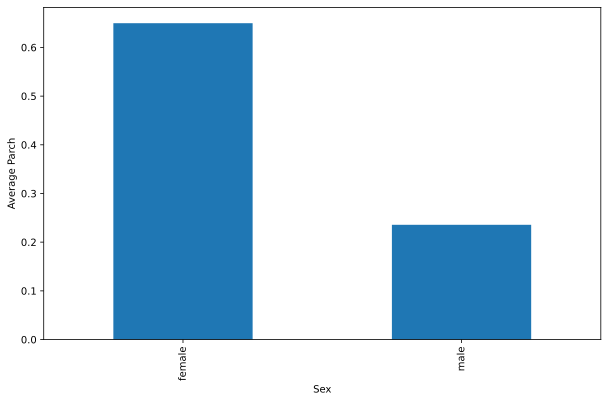

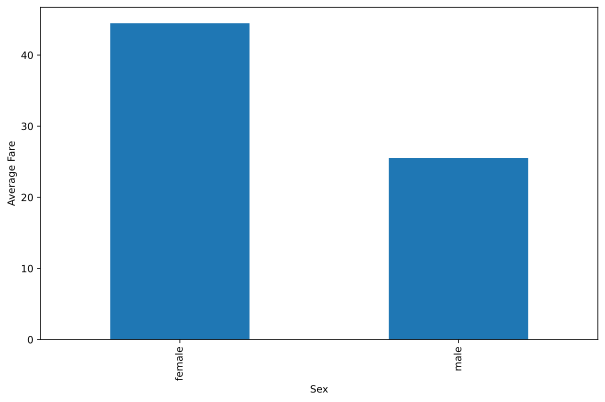

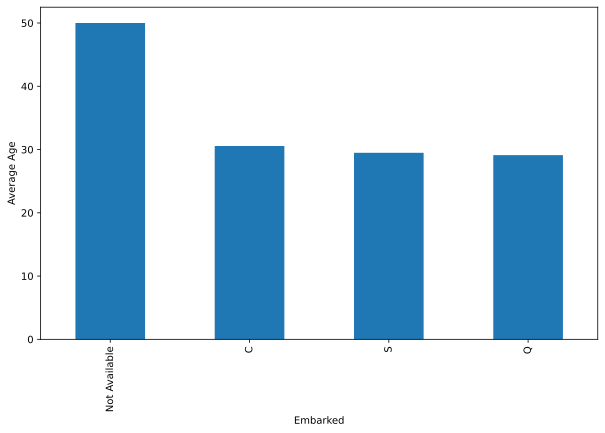

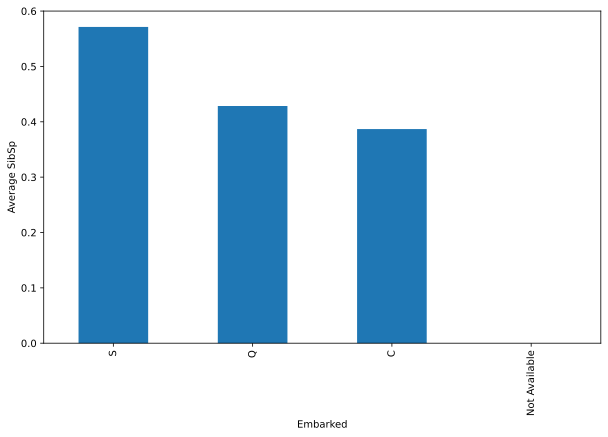

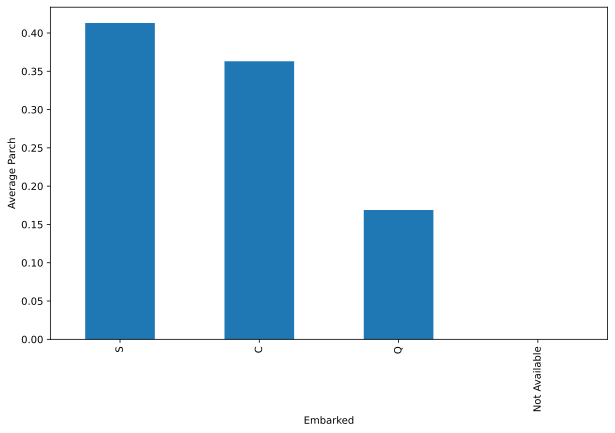

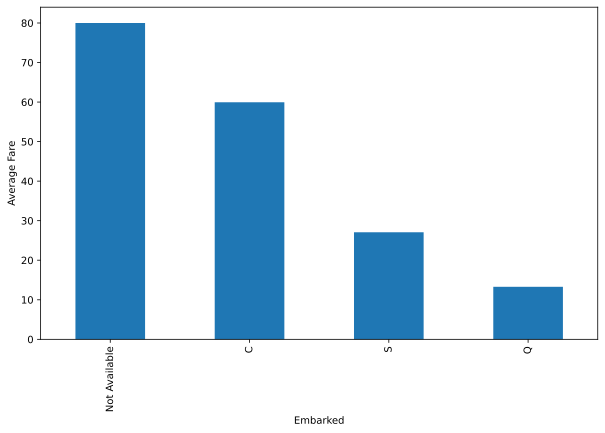

In [25]:
for cat in X.columns.values:
    for num in num_cols:
        plt.figure(figsize=(10,6))
        titanic_eda.groupby(cat)[num].mean().sort_values(ascending=False).plot.bar()
        plt.ylabel(f'Average {num}')
        plt.show()

### Bivariate Analysis: Between target and features

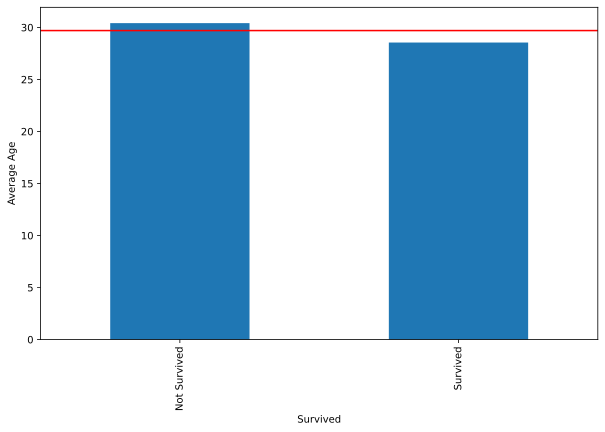

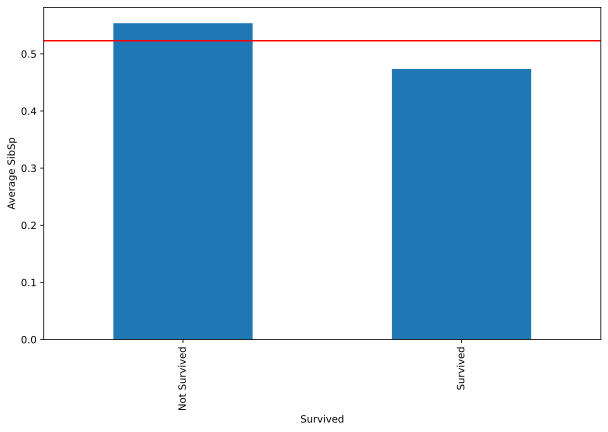

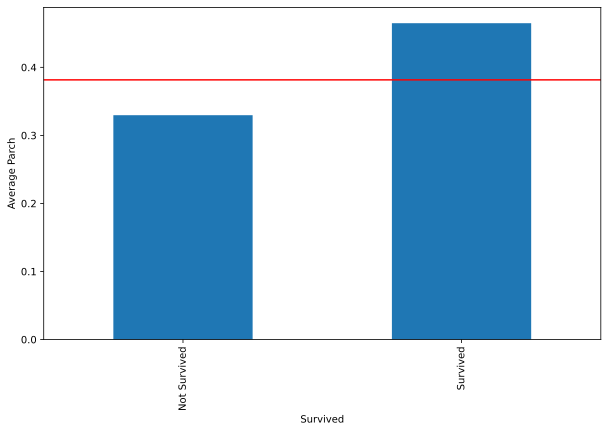

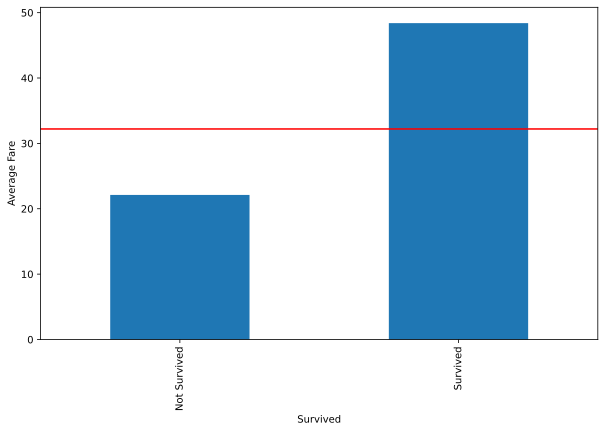

In [26]:
for col in titanic_eda.select_dtypes(np.number).columns.values:
    plt.figure(figsize=(10,6))
    titanic_eda.groupby('Survived')[col].mean().plot.bar()
    plt.axhline(titanic_eda[col].mean(),color='red')
    plt.ylabel(f'Average {col}')
    plt.show()

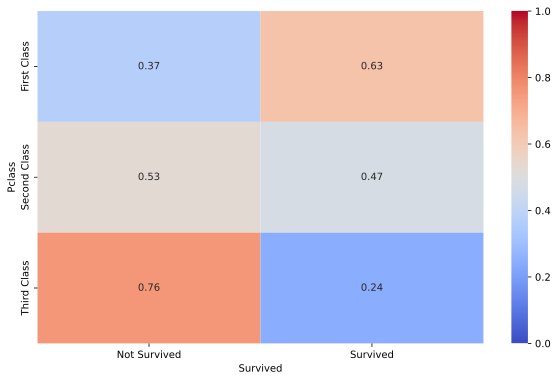

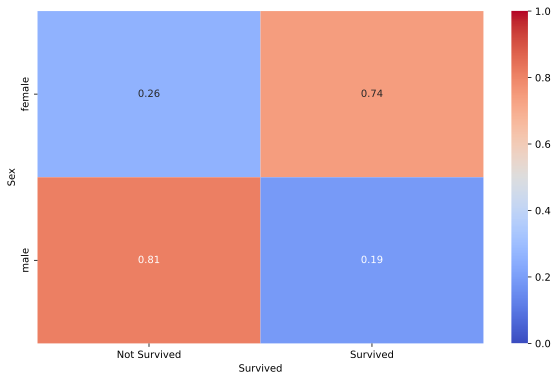

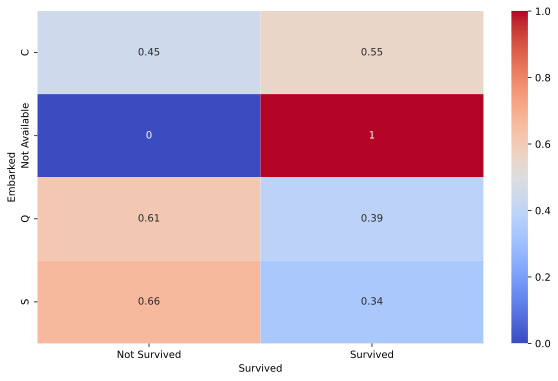

In [27]:
for col in titanic_eda.select_dtypes(include='object').columns.values:
    if col!='Survived':
        plt.figure(figsize=(10,6))
        sns.heatmap(data=pd.crosstab(titanic_eda[col],titanic_eda.Survived,normalize='index'),
                annot=True,
                cmap='coolwarm',
                vmin=0,
                vmax=1);

## feature engineering